# MNIST mit neuronalen Netzen

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

PATH='D:/Users/tri0001f/PycharmProjects/mnist/'


# Daten laden, anzeigen und train-test-split

In diesem Abschnitt wird der Datensatz geladen, ein Beispielbild angezeigt und in eine Trainings- und Testmenge aufgeteilt

In [2]:
# Trainings- und Testdaten laden
train_data=pd.read_csv(PATH+"data/train.csv")
test_data=pd.read_csv(PATH+"data/test.csv")

In [3]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


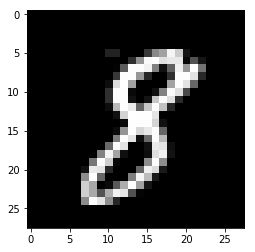

In [4]:
plt.imshow(train_data.iloc[20,1:].values.reshape((28, 28)),cmap='gray')

In [5]:
# Train - Test Split of training-data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data.iloc[:,1:], train_data.iloc[:,0], test_size=0.20, random_state=42)

## Random Forest

Vor der erzeugung eines neuronalen Netzes, hier zunächst eine Lösung mithilfe eines Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf_rf = RandomForestClassifier(max_depth=10, n_estimators=400, min_samples_split=4, random_state=0)
clf_rf.fit(X_train, y_train)
y_pred=clf_rf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       816
          1       0.96      0.99      0.98       909
          2       0.95      0.94      0.94       846
          3       0.95      0.91      0.93       937
          4       0.94      0.94      0.94       839
          5       0.95      0.93      0.94       702
          6       0.96      0.98      0.97       785
          7       0.95      0.92      0.94       893
          8       0.94      0.93      0.94       835
          9       0.88      0.93      0.90       838

avg / total       0.95      0.95      0.95      8400



In [27]:
# Test-Daten vorhersagen und Vorhersage exportieren
test_data_pred=clf_rf.predict(test_data)
pd.DataFrame({'ImageId':range(1,28001), 'Label': test_data_pred}).to_csv(PATH+"data/submit_rf.csv", index=False)

# Tensor Flow 
## Premade Estimator

Hier die einfachste Lösung in TensorFlow mithilfe eines Premade Estimator (hier DNN kein CNN!) 

In [7]:
import tensorflow as tf

D:\Users\tri0001f\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### Feature Columns: Wie sind die Variablen codiert

In [8]:
# Feature columns: das ist notwendig um dem Netz zu sagen wie die Variablen codiert sind (hier alle numerisch)
## hier unnötig da im folgenden nicht mehr verwendet!
my_feature_columns = []
for key in X_train.columns:
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

#### Classifier: Das Netz selbst erzeugen

In [9]:
# Ein Netz mit 3 hidden layer (DNN with 400, 200 und 50 Knoten)
classifier = tf.estimator.DNNClassifier(
feature_columns=my_feature_columns,
# Drei hidden layers mit 400, 200 und 50 Knoten
hidden_units=[400, 200, 50],
# Am Ende müssen 10 classes klassifiziert werden (=10 Ziffern 0-9).
n_classes=10)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'D:\\Users\\tri0001f\\AppData\\Local\\Temp\\tmpkrtz3ktl', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000000558BEF0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#### Die Input-Funktion: Wie kommen die Daten ins Netz

In [10]:
def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle, repeat, and batch the examples.
    #return dataset.shuffle(1000).repeat().batch(batch_size)
    return dataset.batch(batch_size)

In [36]:
#Daten testen

testdata = tf.data.Dataset.from_tensor_slices((dict(X_train), y_train))

iterator = testdata.make_one_shot_iterator()
    #iterator = dataset.make_initializable_iterator()

features, targets  = iterator.get_next()
with tf.Session() as sess:
       # sess.run(iterator.initializer)
        daten=sess.run(features)
        daten=sess.run(features)
        print(targets)


Tensor("IteratorGetNext_1:784", shape=(), dtype=int64)


#### Das Model trainieren

In [17]:
# Train the Model.
classifier.train(input_fn=lambda:train_input_fn(X_train, y_train.values,500),steps=2000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from D:\Users\tri0001f\AppData\Local\Temp\tmpkrtz3ktl\model.ckpt-336
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 337 into D:\Users\tri0001f\AppData\Local\Temp\tmpkrtz3ktl\model.ckpt.
INFO:tensorflow:loss = 994.79755, step = 337
INFO:tensorflow:Saving checkpoints for 404 into D:\Users\tri0001f\AppData\Local\Temp\tmpkrtz3ktl\model.ckpt.
INFO:tensorflow:Loss for final step: 187.71188.


#### Evaluieren: Die Test-Daten bewerten

In [18]:
def eval_input_fn(features, labels, batch_size):
    """An input function for evaluation or prediction"""
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)

    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    # Batch the examples
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    # Return the dataset.
    return dataset

In [19]:
eval_result = classifier.evaluate(input_fn=lambda:eval_input_fn(X_test, y_test,100))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-20-09:19:01
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from D:\Users\tri0001f\AppData\Local\Temp\tmpkrtz3ktl\model.ckpt-404
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-20-09:19:10
INFO:tensorflow:Saving dict for global step 404: accuracy = 0.26738095, average_loss = 1.891957, global_step = 404, loss = 189.19571


In [20]:
print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))


Test set accuracy: 0.267



#### Neue Werte vorhersagen

In [15]:
    predictions = classifier.predict(
        input_fn=lambda:eval_input_fn(test_data,
                                                labels=None,
                                                batch_size=100))

In [16]:
    out=[]
    for pred_dict in (predictions):
        out.append(pred_dict['class_ids'][0])
        #print(pred_dict['probabilities'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from D:\Users\tri0001f\AppData\Local\Temp\tmpkrtz3ktl\model.ckpt-336
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [43]:
## Neue Test-Daten exportieren
pd.DataFrame({'ImageId':range(1,28001), 'Label':out}).to_csv(PATH+"data/submit_tf.csv", index=False)

# TensorFlow
## Custom Estimator

Hier jetzt mit Custom Estimator

In [25]:
def my_model(features, labels, mode, params):
    
   
    net = tf.feature_column.input_layer(features, params['feature_columns'])
    for units in params['hidden_units']:
        net = tf.layers.dense(net, units=units, activation=tf.nn.relu)

    # Compute logits (1 per class).
    logits = tf.layers.dense(net, params['n_classes'], activation=None)
    
    # Compute predictions.
    predicted_classes = tf.argmax(logits, 1)
    if mode == tf.estimator.ModeKeys.PREDICT:
        predictions = {
            'class_ids': predicted_classes[:, tf.newaxis],
            'probabilities': tf.nn.softmax(logits),
            'logits': logits,
        }
        return tf.estimator.EstimatorSpec(mode, predictions=predictions)

    # Compute loss.
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

    # Compute evaluation metrics.
    accuracy = tf.metrics.accuracy(labels=labels,
                                   predictions=predicted_classes,
                                   name='acc_op')
    metrics = {'accuracy': accuracy}
    tf.summary.scalar('accuracy', accuracy[1])

    if mode == tf.estimator.ModeKeys.EVAL:
        return tf.estimator.EstimatorSpec(
            mode, loss=loss, eval_metric_ops=metrics)

    # Create training op.
    assert mode == tf.estimator.ModeKeys.TRAIN

    optimizer = tf.train.AdagradOptimizer(learning_rate=0.1)
    train_op = optimizer.minimize(loss, global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode, loss=loss, train_op=train_op)


In [27]:
classifier2 = tf.estimator.Estimator(
    model_fn=my_model,
    params={
        'feature_columns': my_feature_columns,
        # Two hidden layers of 10 nodes each.
        'hidden_units': [10, 10],
        # The model must choose between 3 classes.
        'n_classes': 10,
    },
    model_dir=PATH + "model_dir")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'D:/Users/tri0001f/PycharmProjects/mnist/model_dir', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000000065F772B0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [28]:
# Train the Model.
classifier2.train(input_fn=lambda:train_input_fn(X_train, y_train.values,100),steps=2000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into D:/Users/tri0001f/PycharmProjects/mnist/model_dir\model.ckpt.
INFO:tensorflow:loss = 47.104324, step = 1
INFO:tensorflow:global_step/sec: 15.582
INFO:tensorflow:loss = 2.2993913, step = 101 (6.419 sec)
INFO:tensorflow:global_step/sec: 23.0657
INFO:tensorflow:loss = 2.2945833, step = 201 (4.335 sec)
INFO:tensorflow:global_step/sec: 23.2751
INFO:tensorflow:loss = 2.29313, step = 301 (4.297 sec)
INFO:tensorflow:Saving checkpoints for 336 into D:/Users/tri0001f/PycharmProjects/mnist/model_dir\model.ckpt.
INFO:tensorflow:Loss for final step: 2.294321.


In [29]:
eval_result = classifier.evaluate(input_fn=lambda:eval_input_fn(X_test, y_test,100))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-20-09:24:22
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from D:/Users/tri0001f/PycharmProjects/mnist/model_dir\model.ckpt-336
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-20-09:24:31
INFO:tensorflow:Saving dict for global step 336: accuracy = 0.10821429, global_step = 336, loss = 2.3012714


In [30]:
print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))


Test set accuracy: 0.108



# TensorFlow
## Custom Estimator CNN

Hier jetzt ein Konvolutionäres  neuronales Netz

In [31]:
def my_model(features, labels, mode, params):
    

    #CNN:
    
    # Input Layer
    input_layer = tf.feature_column.input_layer(features,  params["feature_columns"])
    input_layer = tf.reshape(input_layer, [-1, 28, 28, 1])

  # Convolutional Layer #1
    conv1 = tf.layers.conv2d(
        inputs=input_layer,
        filters=32,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)
  # Pooling Layer #1
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2 and Pooling Layer #2
    conv2 = tf.layers.conv2d(
          inputs=pool1,
          filters=64,
          kernel_size=[5, 5],
          padding="same",
          activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Dense Layer
    pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
    dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
    dropout = tf.layers.dropout(
    inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits Layer
    logits = tf.layers.dense(inputs=dropout, units=10)

    
    

    # Compute predictions.
    predicted_classes = tf.argmax(logits, 1)
    if mode == tf.estimator.ModeKeys.PREDICT:
        predictions = {
            'class_ids': predicted_classes[:, tf.newaxis],
            'probabilities': tf.nn.softmax(logits),
            'logits': logits,
        }
        return tf.estimator.EstimatorSpec(mode, predictions=predictions)

    # Compute loss.
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

    # Compute evaluation metrics.
    accuracy = tf.metrics.accuracy(labels=labels,
                                   predictions=predicted_classes,
                                   name='acc_op')
    metrics = {'accuracy': accuracy}
    tf.summary.scalar('accuracy', accuracy[1])

    if mode == tf.estimator.ModeKeys.EVAL:
        return tf.estimator.EstimatorSpec(
            mode, loss=loss, eval_metric_ops=metrics)

    # Create training op.
    assert mode == tf.estimator.ModeKeys.TRAIN

    optimizer = tf.train.AdagradOptimizer(learning_rate=0.1)
    train_op = optimizer.minimize(loss, global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode, loss=loss, train_op=train_op)


In [32]:

#  mnist_classifier = tf.estimator.Estimator(
#model_fn=cnn_model_fn, model_dir="/tmp/mnist_convnet_model")

classifier = tf.estimator.Estimator(
    model_fn=my_model,
    params={
        'feature_columns': my_feature_columns,
    },
    model_dir=PATH + "models/model_dir1")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'D:/Users/tri0001f/PycharmProjects/mnist/models/model_dir1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000000066591BA8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [33]:
# Train the Model.
classifier.train(input_fn=lambda:train_input_fn(X_train, y_train.values,100),steps=2000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into D:/Users/tri0001f/PycharmProjects/mnist/models/model_dir1\model.ckpt.
INFO:tensorflow:loss = 42.451977, step = 1
INFO:tensorflow:global_step/sec: 3.87237
INFO:tensorflow:loss = 1.0665718, step = 101 (25.824 sec)
INFO:tensorflow:global_step/sec: 4.29978
INFO:tensorflow:loss = 0.68681216, step = 201 (23.260 sec)
INFO:tensorflow:global_step/sec: 4.41151
INFO:tensorflow:loss = 0.6636882, step = 301 (22.665 sec)
INFO:tensorflow:Saving checkpoints for 336 into D:/Users/tri0001f/PycharmProjects/mnist/models/model_dir1\model.ckpt.
INFO:tensorflow:Loss for final step: 0.33446968.


In [34]:
print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))


Test set accuracy: 0.108



In [ ]:
eval_result = classifier.evaluate(input_fn=lambda:eval_input_fn(X_test, y_test,100))

# Keras

Das selbe in Keras

In [49]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model=Sequential()
model.add(Dense(200, input_shape=(784,), kernel_initializer='normal', activation='relu'))
model.add(Dense(150, kernel_initializer='normal', activation='relu'))
model.add(Dense(10,kernel_initializer='normal'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy')


In [50]:
from keras import utils
yhot=utils.to_categorical(y_train.values, num_classes=10)
model.fit(X_train, yhot, epochs=10, batch_size=40)

Epoch 1/10
33600/33600 [==============================] - 117s 3ms/step - loss: 10.4230
Epoch 2/10
33600/33600 [==============================] - 10s 283us/step - loss: 9.8402
Epoch 3/10
33600/33600 [==============================] - 9s 278us/step - loss: 9.8402
Epoch 4/10
33600/33600 [==============================] - 10s 284us/step - loss: 9.8402
Epoch 5/10
33600/33600 [==============================] - 9s 282us/step - loss: 9.8402
Epoch 6/10
33600/33600 [==============================] - 9s 281us/step - loss: 9.8402
Epoch 7/10
33600/33600 [==============================] - 10s 283us/step - loss: 9.8402
Epoch 8/10
33600/33600 [==============================] - 9s 283us/step - loss: 9.8402
Epoch 9/10
33600/33600 [==============================] - 10s 284us/step - loss: 9.8402
Epoch 10/10
33600/33600 [==============================] - 10s 284us/step - loss: 9.8402


In [53]:
prediction=model.predict_classes(X_test)

In [54]:
prediction

array([1, 1, 4, ..., 1, 0, 4], dtype=int64)

In [55]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.90      0.61      0.72       816
          1       0.38      0.92      0.54       909
          2       1.00      0.00      0.01       846
          3       0.00      0.00      0.00       937
          4       0.14      0.97      0.25       839
          5       0.00      0.00      0.00       702
          6       0.00      0.00      0.00       785
          7       0.00      0.00      0.00       893
          8       0.00      0.00      0.00       835
          9       0.00      0.00      0.00       838

avg / total       0.24      0.26      0.15      8400



D:\Users\tri0001f\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [62]:
y_testhot=utils.to_categorical(y_test.values, num_classes=10)
score=model.evaluate(X_test, y_testhot, verbose=0)
print(score)

9.86465823218936


# Keras CNN
### Keras mit CNN

In [71]:
#https://gist.github.com/alexcpn/0683bb940cae510cf84d5976c1652abd

from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dropout
model=Sequential()
model.add(Convolution2D(32,(3,3), activation='relu', data_format='channels_first', input_shape=(1,28,28)))
model.add(Convolution2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [76]:
X_train=X_train.as_matrix().reshape(X_train.shape[0],1,28,28)

In [78]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, yhot, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
33600/33600 [==============================] - 309s 9ms/step - loss: 7.8201 - acc: 0.4602
Epoch 2/10
33600/33600 [==============================] - 119s 4ms/step - loss: 0.2876 - acc: 0.9147
Epoch 3/10
33600/33600 [==============================] - 110s 3ms/step - loss: 0.1813 - acc: 0.9457
Epoch 4/10
33600/33600 [==============================] - 116s 3ms/step - loss: 0.1466 - acc: 0.9562
Epoch 5/10
33600/33600 [==============================] - 116s 3ms/step - loss: 0.1295 - acc: 0.9617
Epoch 6/10
33600/33600 [==============================] - 112s 3ms/step - loss: 0.1112 - acc: 0.9667
Epoch 7/10
33600/33600 [==============================] - 112s 3ms/step - loss: 0.1120 - acc: 0.9668
Epoch 8/10
33600/33600 [==============================] - 111s 3ms/step - loss: 0.1021 - acc: 0.9694
Epoch 9/10
33600/33600 [==============================] - 109s 3ms/step - loss: 0.0969 - acc: 0.9719
Epoch 10/10
33600/33600 [==============================] - 112s 3ms/step - loss: 0.0908 - a

In [80]:
X_test=X_test.as_matrix().reshape(X_test.shape[0],1,28,28)
prediction=model.predict_classes(X_test)

In [81]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       816
          1       0.99      0.99      0.99       909
          2       0.98      0.98      0.98       846
          3       0.99      0.97      0.98       937
          4       0.98      0.98      0.98       839
          5       0.99      0.97      0.98       702
          6       0.98      0.99      0.98       785
          7       0.99      0.98      0.98       893
          8       0.98      0.99      0.98       835
          9       0.97      0.98      0.98       838

avg / total       0.98      0.98      0.98      8400



In [82]:
y_testhot=utils.to_categorical(y_test.values, num_classes=10)
score=model.evaluate(X_test, y_testhot, verbose=0)
print(score)

[0.06593920911660549, 0.9827380952380952]
